# DAML 06 - Monte Carlo

Michal Grochmal <michal.grochmal@city.ac.uk>

The idea of the Monte Carlo technique consists of measuring random points in a search space
and then take out conclusions from the measured points.  The bigger number of random points
the more likely we are to an exact solution.  In other words, the method *converges* on a solution.

We will play with `NumPy` to build a Monte Carlo method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

As an example we can estimate the value of $\pi$ using the distance between the origin
and the radius of a circle centered on the origin.  This comes straight from Pythagoras:

$$h^2 = a^2 + b^2 \Leftrightarrow d = \sqrt{x^2 + y^2}$$

If a point is inside the circle, then the distance will smaller then the radius, otherwise
it will be bigger.  We will use a circle or radius 1, since that is the basic trigonometric circle.
The argument to our estimator is the number of points used.

3.1120000000000001

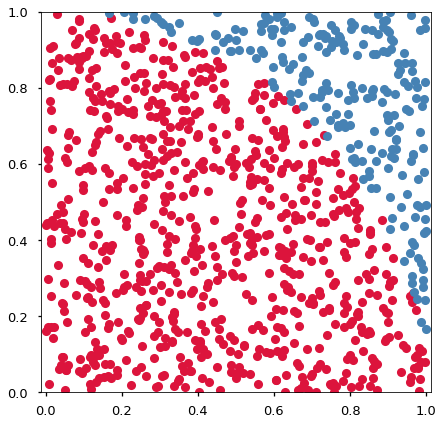

In [2]:
def approx_pi(n=1000, plot=False):
    points = np.random.rand(n, 2)
    result = np.sqrt(points[:, 0]**2 + points[:, 1]**2) < 1.0
    pi = 4 * (result.sum() /  n)
    if plot:
        fig, ax = plt.subplots(figsize=(7, 7))
        ax.plot(points[result, 0], points[result, 1], 'o', color='crimson')
        ax.plot(points[~result, 0], points[~result, 1], 'o', color='steelblue')
        ax.axis('equal')
        ax.axis([0, 1, 0, 1])
    return pi


approx_pi(plot=True)

Kind of fuzzy, and $\pi$ is quite off too, let's try more points.

3.142792

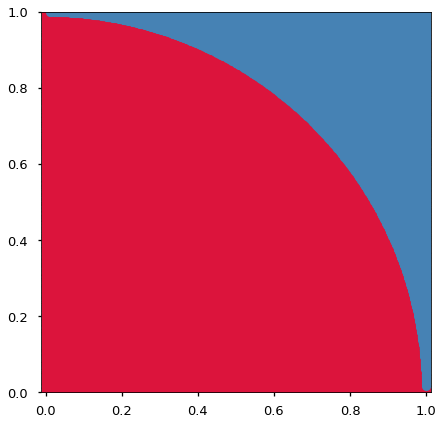

In [3]:
approx_pi(10**6, plot=True)

That's much better.
This makes for the points that the more points we use the more likely
we are to reach the correct solution.

In [4]:
for i in range(7):
    print(10**i, approx_pi(10**i))

1 4.0
10 3.2
100 3.12
1000 3.156
10000 3.1432
100000 3.14532
1000000 3.139776


Hmmm... but that still variates wildly.
What if we repeat the approximation and then take the mean of that.

In [5]:
def approx_times(func, times=10, *args, **kwargs):
    results = []
    for i in range(times):
        results.append(func(*args, **kwargs))
    return np.mean(results)


approx_times(approx_pi, times=3, n=1000)

3.1333333333333333

Doesn't seem like an improvement.
Let's try to do that on a grid,
i.e. we approximate several numbers of points and repeat that several different times.

In [6]:
for i in range(1, 26):
    for j in range(7):
        if i % 5 == 0 and j % 3 == 0:
            print(i, 10**j, approx_times(approx_pi, times=i, n=10**j))
np.pi

5 1 2.4
5 1000 3.1312
5 1000000 3.1412576
10 1 3.2
10 1000 3.154
10 1000000 3.142158
15 1 1.86666666667
15 1000 3.16746666667
15 1000000 3.1406608
20 1 3.4
20 1000 3.1488
20 1000000 3.14167
25 1 3.2
25 1000 3.14976
25 1000000 3.14150832


3.141592653589793

It gets better and better but either increasing the number of random points
or taking the mean from several runs, makes for the same improvement.
In other words there is no real difference in the output if we either
increase the number of random points or repeat the measure several times.
This is because Monte Carlo is a **brute force** algorithm,
it tries many, many combinations to try to find a solution.

But is Monte Carlo Machine Learning?